In [39]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 

In [63]:
def dr(momento_lineal):
    return momento_lineal

def dphi(momento_angular, posicion_radial):
    return (momento_angular)/((posicion_radial)**2)

def drPr(momento_angular, posicion_radial, posicion_angular,tiempo):
    
    R = np.sqrt(1 + posicion_radial**2 - 2*posicion_radial*np.cos(posicion_angular-frecuencia*tiempo))
    return (momento_angular**2)/(posicion_radial**3) - (gradiente)*((1/(posicion_radial**2)) + ((relacion_masa)*(posicion_radial - np.cos(posicion_angular-frecuencia*tiempo))/(R)**3))

def drPphi(posicion_radial, posicion_angular, tiempo):
    
    R = np.sqrt(1 + posicion_radial**2 - 2*posicion_radial*np.cos(posicion_angular-frecuencia*tiempo))               
    return -((gradiente*relacion_masa*posicion_radial)*(np.sin(posicion_angular-frecuencia*tiempo))/(R**3))


In [64]:
frecuencia = 2.6617e-6
G = 6.67e-11
mT = 5.9736e24
rT = 6.3781e6 #rad tierra
mL = 0.07349e24
rL = 1.7374e6 #rad luna
d = 3.844e8 # tierra Luna

omega = frecuencia

In [65]:
gradiente = ((G*mT)/d**3)
relacion_masa = mL/mT

In [66]:
#Definicion de las condiciones iniciales

inicial_radial = rT
inicial_angular = 0./180.*np.pi 
theta0 = 25/180.*np.pi 

v0 = 11100

lineal_moment = (v0/d)*np.cos(theta0-inicial_angular)
angular_moment = (inicial_radial/d)*(v0/d)*np.sin(theta0-inicial_angular)


initial_conditions = [inicial_radial/d, v0/d,lineal_moment ,angular_moment]
print(initial_conditions)

[0.0165923517169615, 2.8876170655567117e-05, 2.617069832493968e-05, 2.0248637443553493e-07]


In [67]:
h = 10
tiempo_inicial = 0
tiempo_final = 1000000
N = int((tiempo_final - tiempo_inicial)/ h) + 1

time = np.linspace(tiempo_inicial,tiempo_final,N) #YA

    
frecuencia = omega

In [68]:
radial_position = np.zeros(len(time))
angular_position = np.zeros(len(time))
linear_moment = np.zeros(len(time))
angular_moment = np.zeros(len(time))

radial_position[0] = initial_conditions[0]
angular_position[0] = initial_conditions[1]
linear_moment[0] = initial_conditions[2]
angular_moment[0] = initial_conditions[3]


In [69]:
for i in range(1, len(time)):
    k11 = dr(linear_moment[i-1])
    k21 = dphi(angular_moment[i-1], radial_position[i-1])
    k31 = drPr(angular_moment[i-1], radial_position[i-1], angular_position[i-1],time[i])
    k41 = drPphi(radial_position[i-1],angular_position[i-1], time[i])

    k12 = dr(linear_moment[i-1] + (0.5*k31*h))  
    k22 = dphi(angular_moment[i-1] + (0.5*k41*h), radial_position[i-1] + (0.5*k11*h))
    k32 = drPr(angular_moment[i-1] + (0.5*k41*h), radial_position[i-1] + (0.5*k11*h), angular_position[i-1] + (0.5*k21*h),time[i])   
    k42 = drPphi(radial_position[i-1] + (0.5*k11*h)  , angular_position[i-1] + (0.5*k21*h) , time[i])

    k13 = dr(linear_moment[i-1] + (0.5*k32*h))
    k23 = dphi(angular_moment[i-1] + (0.5*k42*h), radial_position[i-1] + (0.5*k12*h))
    k33 = drPr(angular_moment[i-1] + (0.5*k42*h), radial_position[i-1] + (0.5*k12*h), angular_position[i-1] + (0.5*k22*h),time[i])
    k43 = drPphi(radial_position[i-1] + (0.5*k12*h) , angular_position[i-1] + (0.5*k22*h), time[i])

    k14 = dr(linear_moment[i-1] + (k33*h))
    k24 = dphi(angular_moment[i-1] + (k43*h), radial_position[i-1] + (k13*h))
    k34 = drPr(angular_moment[i-1] + (k43*h), radial_position[i-1] + (k13*h), angular_position[i-1] + (k23*h),time[i])
    k44 = drPphi(radial_position[i-1] + (k13*h) , angular_position[i-1] + (k23*h), time[i])

    radial_position[i] = radial_position[i - 1] + (h / 6) * (k11 + 2 * k12 + 2 * k13 + k14)
    angular_position[i] = angular_position[i - 1] + (h / 6) * (k21 + 2 * k22 + 2 * k23 + k24)
    linear_moment[i] = linear_moment[i - 1] + (h / 6) * (k31 + 2 * k32 + 2 * k33 + k34)
    angular_moment[i] = angular_moment[i - 1] + (h / 6) * (k41 + 2 * k42 + 2 * k43 + k44)


<IPython.core.display.Javascript object>


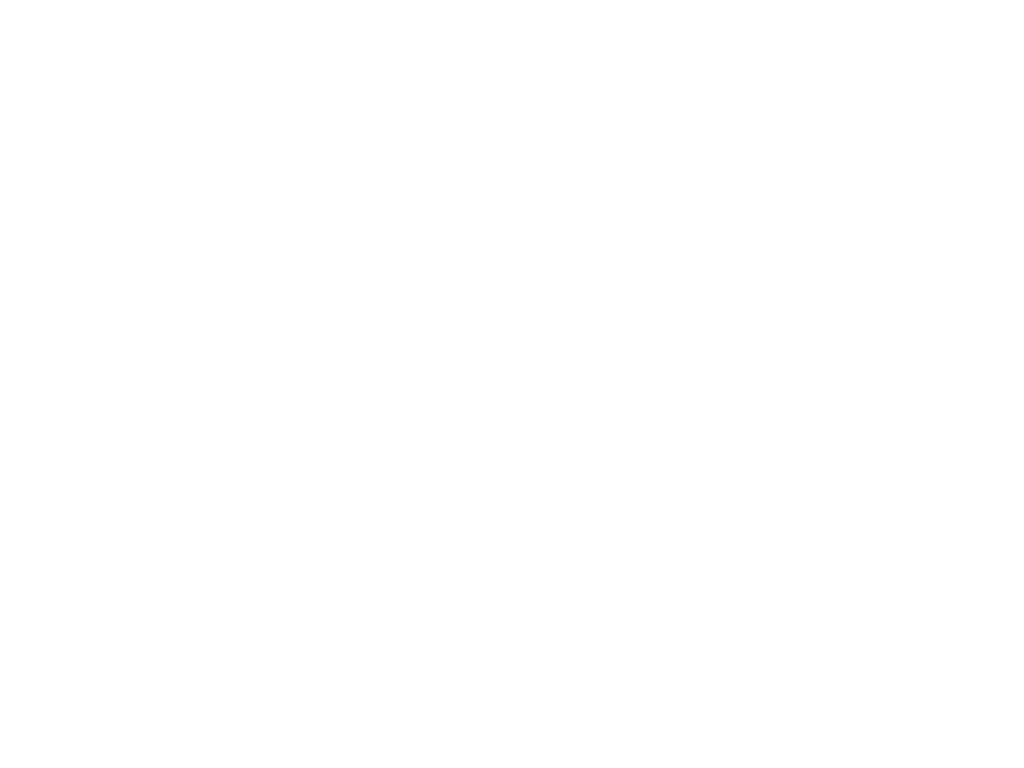

<IPython.core.display.Javascript object>


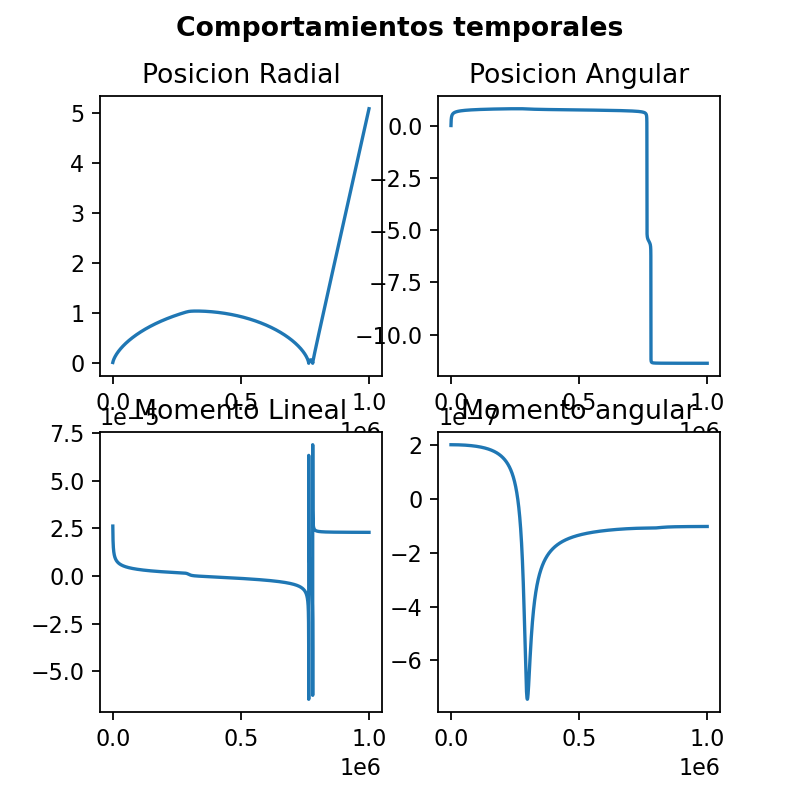

Text(0.5, 1.0, 'Momento angular')

In [70]:
plt.figure()
figura1 , compartimientos = plt.subplots(2,2)
figura1.suptitle('Comportamientos temporales',fontweight ="bold")
figura1.set_figheight(5)
figura1.set_figwidth(5)

compartimientos[0,0].plot(time,radial_position)
compartimientos[0,0].set_title("Posicion Radial")

compartimientos[0,1].plot(time,angular_position)
compartimientos[0,1].set_title("Posicion Angular")

compartimientos[1,0].plot(time,linear_moment)
compartimientos[1,0].set_title("Momento Lineal")

compartimientos[1,1].plot(time,angular_moment)
compartimientos[1,1].set_title("Momento angular")


In [71]:
X = []
Y = []
for i in range(len(radial_position)):
    x = radial_position[i]*np.cos(angular_position[i])
    y = radial_position[i]*np.sin(angular_position[i])
    X.append(x)
    Y.append(y)

In [76]:
XL = []
YL = []

for i in range(len(time)):
    x = np.cos(frecuencia*time[i])
    y = np.sin(frecuencia*time[i])
    XL.append(x)
    YL.append(y)

<IPython.core.display.Javascript object>


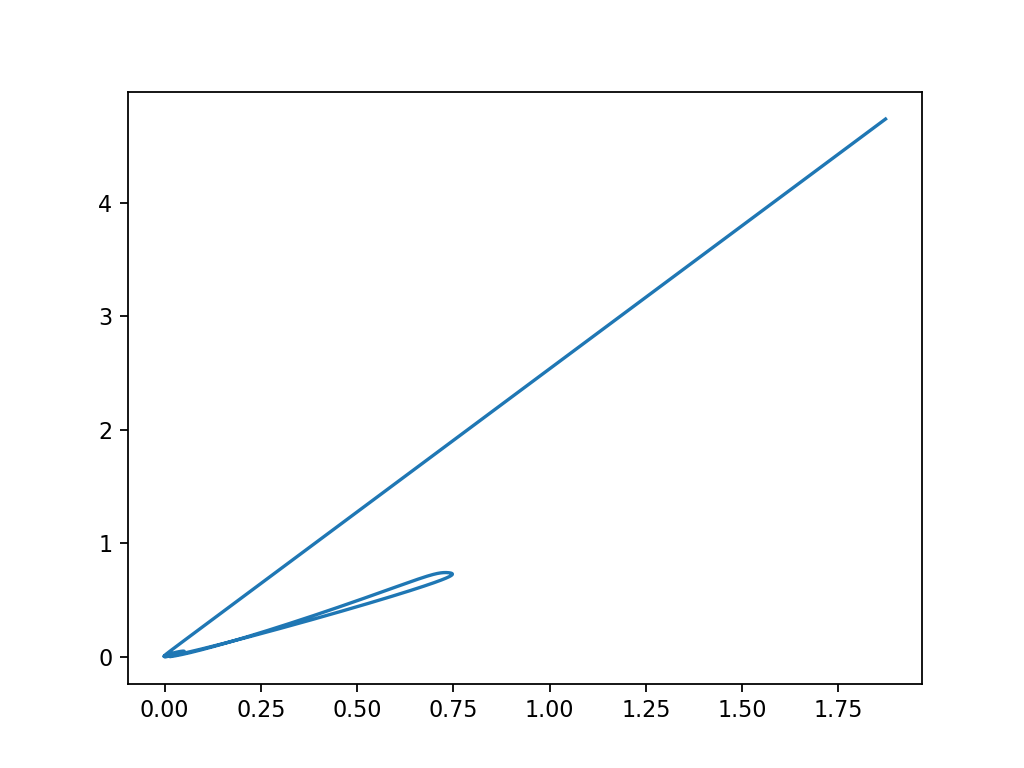

No handles with labels found to put in legend.


In [77]:
plt.figure()
plt.plot(X,Y)


In [84]:
Limits = np.array([2.,2.])
X_reducido = []
Y_reducido = []

XL_reducido = []
YL_reducido = []
def reduce_time(time, value):
    reduce = []
    for i in range(len(time)):
        if time[i]%value == 0:
            reduce.append(time[i])
            X_reducido.append(X[i])
            Y_reducido.append(Y[i])
            XL_reducido.append(XL[i])
            YL_reducido.append(YL[i])
            
    return reduce
reducido = reduce_time(time, 10000)
print(X_reducido)

[0.016592351710043873, 0.11977145646472136, 0.17770349355630355, 0.22375560054233545, 0.2631383768541551, 0.29800345816451407, 0.3295035799242216, 0.3583476727418051, 0.3850114866797795, 0.40983429151104794, 0.43306918860864807, 0.4549117418904912, 0.4755174196633943, 0.49501281406760994, 0.5135031950395023, 0.531077808128958, 0.5478137407374262, 0.5637788684995757, 0.5790342225710894, 0.5936360291536789, 0.6076376383637505, 0.621091575188681, 0.6340520257702713, 0.6465782651339065, 0.6587399537952123, 0.6706261523393146, 0.6823619026796806, 0.6941396743998677, 0.7062648694711495, 0.7189787631995768, 0.730504378823902, 0.737897453971646, 0.7423100192303215, 0.745041990515484, 0.7466505958006617, 0.7473893988064242, 0.7473895498685712, 0.7467257194665493, 0.7454431998607057, 0.743570453563353, 0.7411255048058629, 0.7381194461510663, 0.7345584757095736, 0.7304451322559352, 0.7257790657892822, 0.7205575244053245, 0.7147756590027271, 0.7084267048768659, 0.7015020753517668, 0.69399138847881

<IPython.core.display.Javascript object>


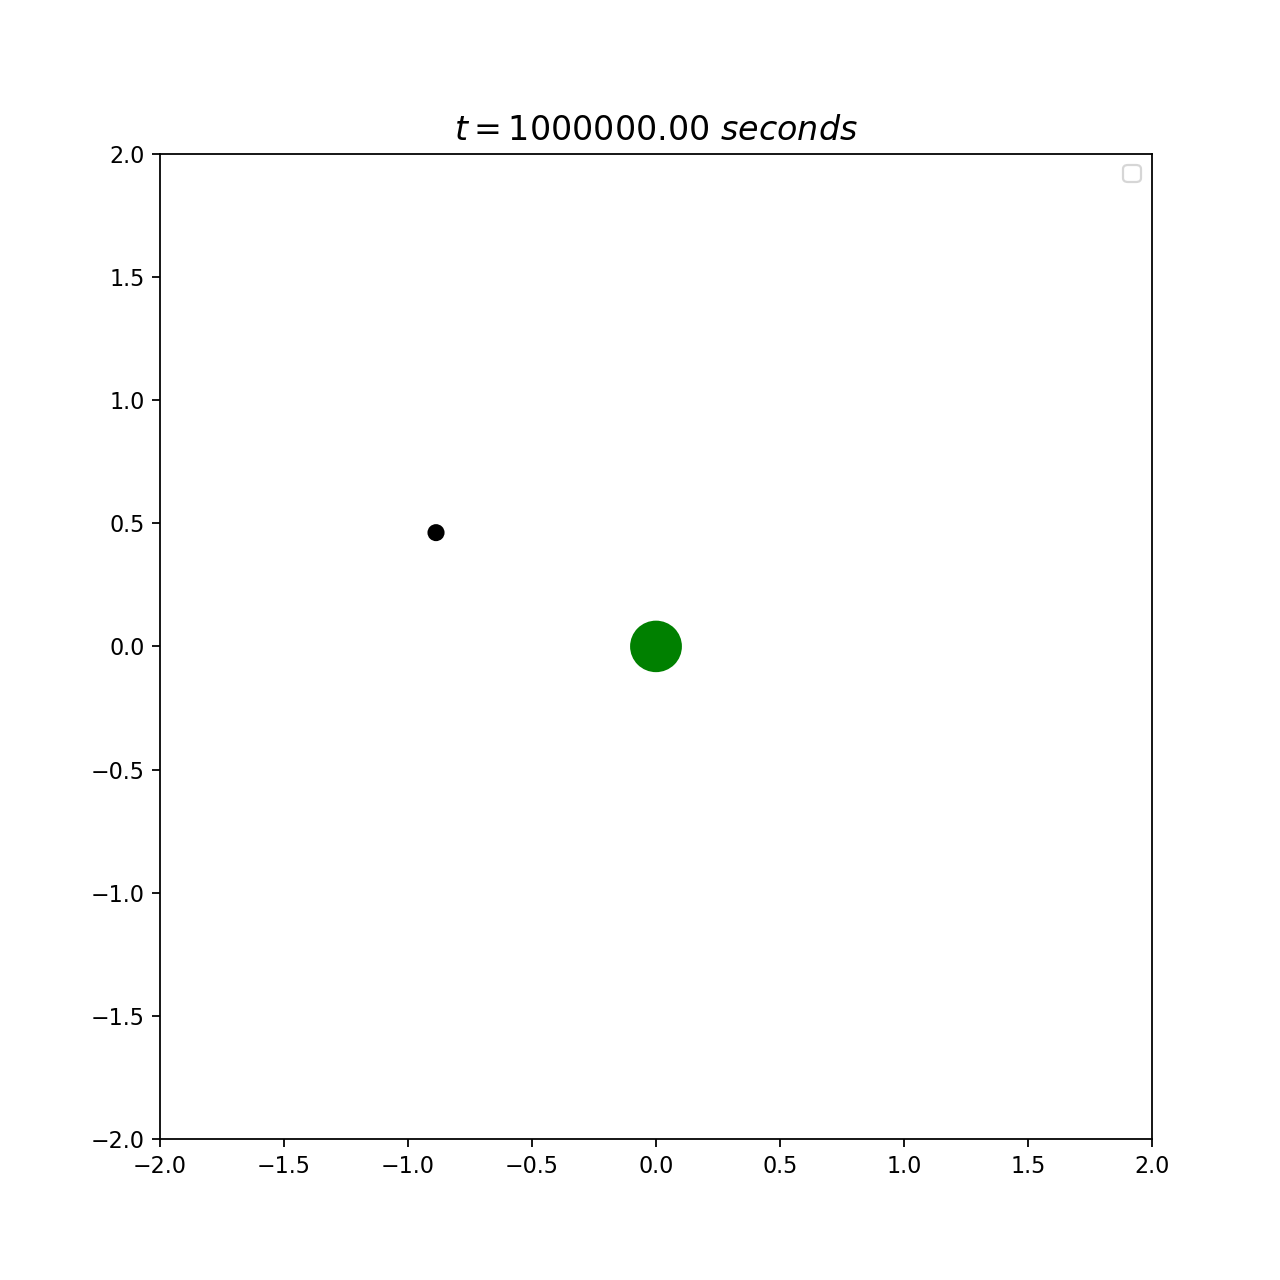

In [90]:
XT = np.zeros(len(reducido))
YT = np.zeros(len(reducido))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(reducido[i]), fontsize=15)

    x1 = X_reducido[i]
    y1 = Y_reducido[i]
    
    x2 = XL_reducido[i]
    y2 = YL_reducido[i]
    
    x3 = XT[i]
    y3 = YT[i]

    
    circle1 = plt.Circle((x1,y1), 0.01, color='red', fill=True )
    plot = ax.add_patch(circle1)
    
    circle2 = plt.Circle((x2,y2), 0.03, color='black', fill=True )
    plot = ax.add_patch(circle2)
    
    circle3 = plt.Circle((x3,y3), 0.1, color='green', fill=True )
    plot = ax.add_patch(circle3)
    

    ax.legend()

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(reducido),init_func=init)

